In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
SEED = 1926

In [3]:
DATA_PATH = "../data/trainset.csv"
data_train = pd.read_csv(DATA_PATH, delimiter=",")

In [4]:
data_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,725,Germany,Male,19,0,75888.20,1,0,0,45613.75,0
1,850,Germany,Male,39,3,124548.99,2,1,1,120380.12,0
2,443,France,Female,54,3,138547.97,1,1,1,70196.23,1
3,692,France,Female,30,7,0.00,2,1,1,18826.34,0
4,687,France,Male,28,7,108116.66,1,1,1,27411.19,0
...,...,...,...,...,...,...,...,...,...,...,...
7995,796,France,Male,24,8,0.00,2,1,0,61349.37,0
7996,850,Germany,Male,61,3,141784.02,1,1,1,92053.75,0
7997,643,France,Male,62,9,0.00,2,0,0,155870.82,0
7998,577,Spain,Male,41,4,89015.61,1,0,1,135227.23,0


In [5]:
cat_variables = ["country","gender","credit_card","active_member"]
dis_variables = ["products_number","tenure","age","credit_score"]
con_variables = ["balance","estimated_salary"]
num_variables = dis_variables + con_variables

target_variable = ["churn"]

In [6]:
X_train = data_train.drop(columns=target_variable)
y_train = data_train[target_variable]

### Target Variable

In [7]:
# Calcolo delle percentuali di churn
total_count = y_train.shape[0]
churn_count = y_train["churn"].sum(axis=0)

yes_percentage = (churn_count / total_count) * 100
no_percentage = 100 - yes_percentage

# Creazione della tabella
table = pd.DataFrame({"churn": ["yes", "no"], "percentage": [f"{yes_percentage:.2f}%", f"{no_percentage:.2f}%"]}).set_index("churn")

print(table)

      percentage
churn           
yes       20.38%
no        79.62%


### Numeric Variables
- > Continuous Variables
- > Discrete Variables

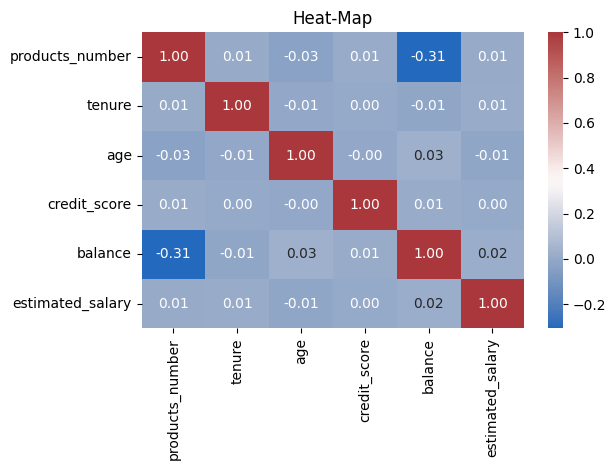

In [8]:
sns.heatmap(X_train[num_variables].corr(),annot=True, fmt=".2f", cmap="vlag")
plt.title("Heat-Map")
plt.tight_layout();

In [9]:
def plot_box(data_train, x, y, hue=None):
    fig, ax = plt.subplots(figsize=(5, 5))

    sns.boxplot(data=data_train, x=x, y=y, hue=hue)
    ax.set_title("Box Plot")
    ax.set_xlabel(x)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

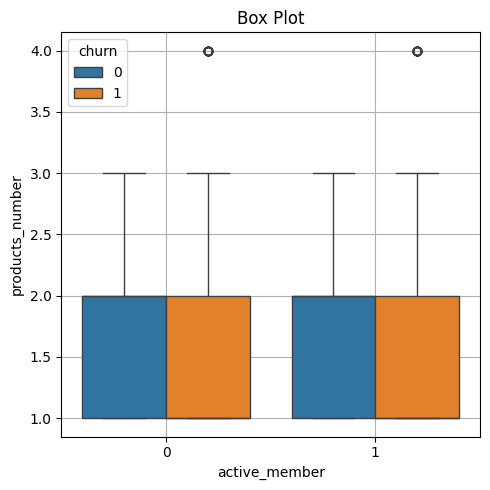

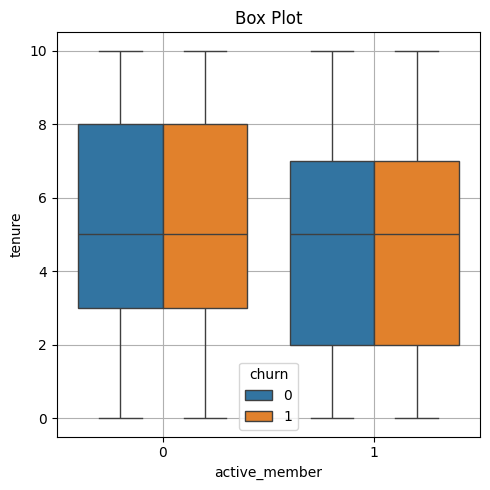

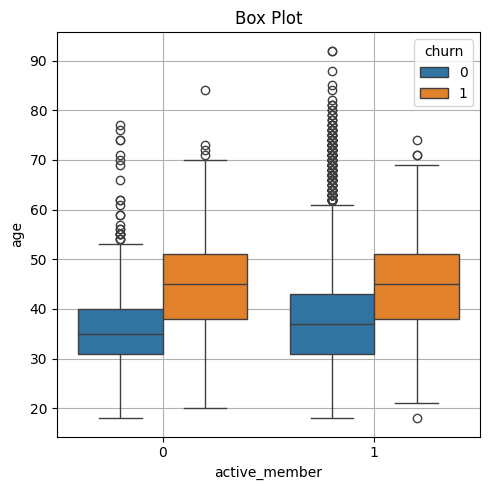

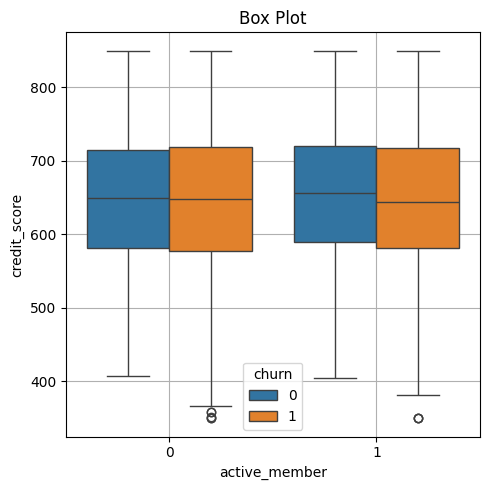

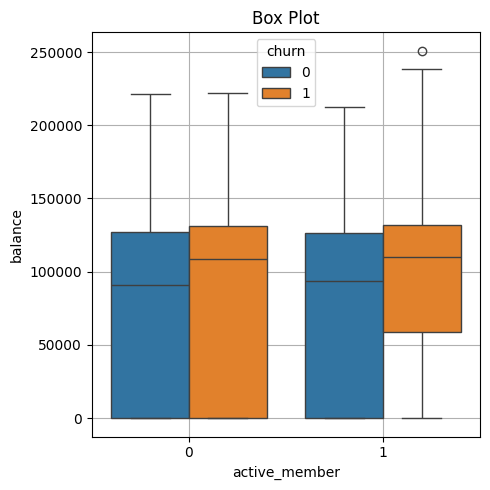

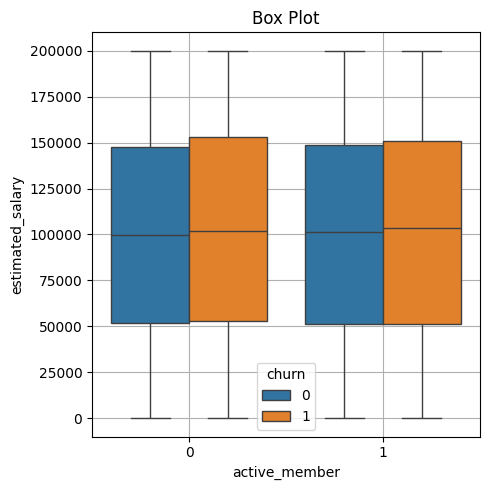

In [10]:
for clm in num_variables:
    plot_box(data_train, x="active_member", y=clm, hue="churn")

#### Continuous Variables

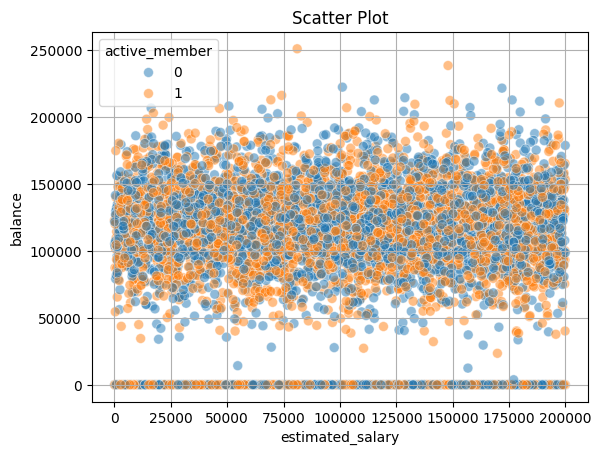

In [19]:
sns.scatterplot(data=X_train, x="estimated_salary", y="balance", hue="active_member", alpha=0.5, s=50, edgecolor='w')
plt.xlabel("estimated_salary")
plt.ylabel("balance")
plt.title("Scatter Plot")
plt.legend(title="active_member")
plt.grid(True)
plt.tight_layout;

### Categorical Variables

In [18]:
def plot_count(data, x, y):
    sns.countplot(data=data, x=x, hue=y, stat="percent")
    plt.xlabel(x)
    plt.ylabel("percent")
    plt.title("Count Plot")
    plt.show()

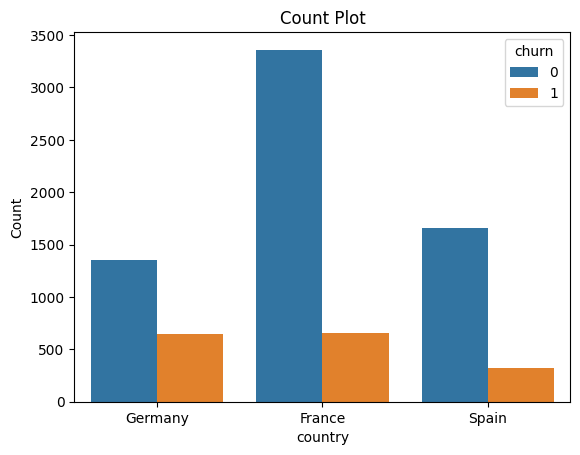

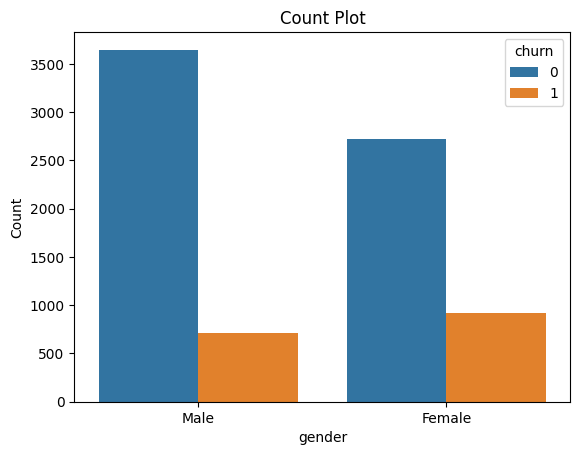

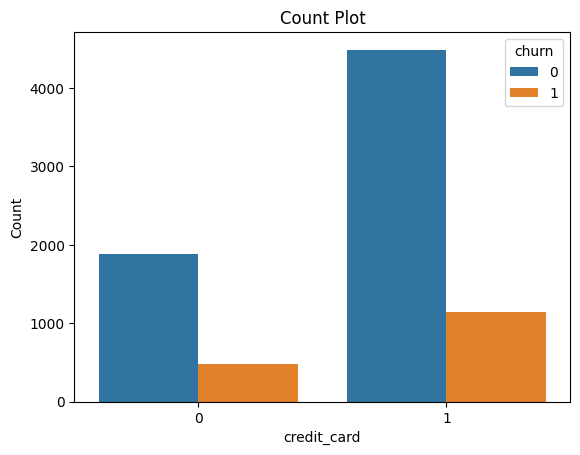

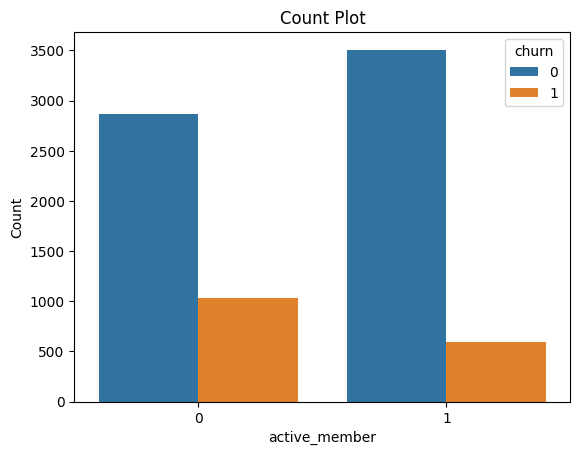

In [17]:
for clm in cat_variables:
    plot_count(data_train, x=clm, y="churn")